In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [3]:
#Gradiente descendiente

G=(lambda x,y: np.log(x**2+y**2) - np.sin(x*y), \
   lambda x,y: np.exp(x-y) + np.cos(x*y))

In [4]:
def GetVectorF(G,r):
    
    dim = len(G)
    
    v = np.zeros(dim)
    
    for i in range(dim):
        v[i] = G[i](r[0],r[1])
        
    return v

In [5]:
def GetJacobian(G,r,h=1e-6):
    
    dim = len(G)
    
    J = np.zeros((dim,dim))
    
    for i in range(dim):
        J[i,0] = (  G[i](r[0]+h,r[1]) - G[i](r[0]-h,r[1]) )/(2*h)
        J[i,1] = (  G[i](r[0],r[1]+h) - G[i](r[0],r[1]-h) )/(2*h)
        
        
    return J.T

In [6]:
def GetMetric(G,r):
    v = GetVectorF(G,r)
    return 0.5*np.linalg.norm(v)**2

In [7]:
def GetFig(F,R,it):
    
    fig = plt.figure(figsize=(8,4))
    
    labels = ['X','Y']
    
    ax = fig.add_subplot(1,2,1)
    ax1 = fig.add_subplot(1,2,2)

    ax.set_title('Metric: %.20f' %(F[it]))

    ax.plot(F[:it])
    ax.set_xlabel('%.0f' %(it))
    ax.set_yscale('log')
    ax1.plot(R[:it],label=labels)
    ax1.set_xlabel('%.0f' %(it))
    ax1.legend(loc=0)
    
    plt.show()

In [8]:
def GetSolve(G,r,lr=1e-3,epochs=int(1e5),error=1e-7):
    d = 1
    it = 0
    Vector_F = np.array([])
    R_vector = np.array(r)
    while d > error and it < epochs:
        
        CurrentF = GetMetric(G,r)
        J = GetJacobian(G,r)
        GVector = GetVectorF(G,r)
        #Machine Learning
        r -= lr*np.dot(J,GVector) 
        R_vector = np.vstack((R_vector,r))
        NewF = GetMetric(G,r)
        Vector_F = np.append(Vector_F,NewF)
        d = np.abs( CurrentF - NewF )/NewF

        it += 1
        
    if it == epochs:
        print(' Entrenamiento no completado ')
    
    GetFig(Vector_F,R_vector,it-1)    
    return r,it

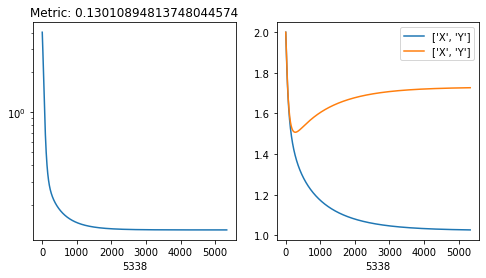

In [9]:
xsol,it= GetSolve(G,[2,2])